In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls

In [2]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [3]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [4]:
theta_input = np.append(f_1, beta)

In [5]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

In [6]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [7]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [8]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m , gamma, time_in)

In [9]:
result = sampler.run_mcmc(start_pos, nsteps)

/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


In [10]:
sampler.acceptance_fraction

array([0.37266667, 0.361     , 0.36533333, 0.37966667, 0.37766667,
       0.37033333, 0.37833333, 0.35366667, 0.36933333, 0.36666667,
       0.35233333, 0.37666667, 0.37233333, 0.37266667, 0.37233333,
       0.36066667, 0.36166667, 0.37833333, 0.38733333, 0.38133333,
       0.38      , 0.37033333, 0.37466667, 0.38033333, 0.37566667,
       0.375     , 0.36133333, 0.37833333, 0.37      , 0.37133333,
       0.382     , 0.376     , 0.36533333, 0.384     , 0.36333333,
       0.357     , 0.36733333, 0.35766667, 0.363     , 0.364     ,
       0.377     , 0.36733333, 0.37366667, 0.34633333, 0.36666667,
       0.368     , 0.373     , 0.38466667, 0.38166667, 0.369     ,
       0.374     , 0.37333333, 0.372     , 0.36333333, 0.36866667,
       0.37133333, 0.37166667, 0.365     , 0.37366667, 0.35633333,
       0.38233333, 0.364     , 0.36833333, 0.38066667, 0.365     ,
       0.36966667, 0.376     , 0.37966667, 0.37333333, 0.36      ,
       0.378     , 0.38466667, 0.37533333, 0.36833333, 0.36533

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

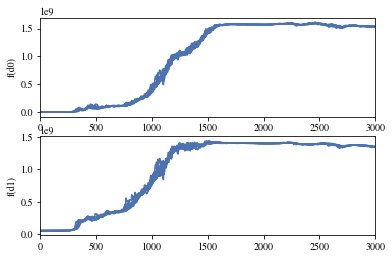

In [11]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

In [12]:
samples = sampler.chain[:,2000:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [13]:
q_50 = q.quantile([0.5], axis=0)
q_50_array = q_50.values
q_50_array = q_50_array.flatten()

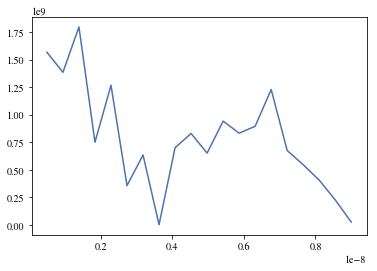

In [14]:
plt.plot(d, q_50_array)